In [1]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_linnerud

In [2]:
linnerud_data = load_linnerud()


In [3]:
linnerud_data

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
D = linnerud_data['data']

In [5]:
D.shape

(20, 3)

In [6]:
D

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [7]:
import numpy as np
np.cov(D.T, ddof=1)

array([[  27.94473684,  230.10789474,  134.38421053],
       [ 230.10789474, 3914.57631579, 2146.98421053],
       [ 134.38421053, 2146.98421053, 2629.37894737]])

In [8]:
var_thresh = 100
sel = VarianceThreshold(threshold=var_thresh)
sel.fit_transform(D)

array([[162.,  60.],
       [110.,  60.],
       [101., 101.],
       [105.,  37.],
       [155.,  58.],
       [101.,  42.],
       [101.,  38.],
       [125.,  40.],
       [200.,  40.],
       [251., 250.],
       [120.,  38.],
       [210., 115.],
       [215., 105.],
       [ 50.,  50.],
       [ 70.,  31.],
       [210., 120.],
       [ 60.,  25.],
       [230.,  80.],
       [225.,  73.],
       [110.,  43.]])

In [9]:
from sklearn.preprocessing import MinMaxScaler
normalized_D = MinMaxScaler().fit_transform(D)
normalized_D

array([[0.25      , 0.55721393, 0.15555556],
       [0.0625    , 0.29850746, 0.15555556],
       [0.6875    , 0.25373134, 0.33777778],
       [0.6875    , 0.27363184, 0.05333333],
       [0.75      , 0.52238806, 0.14666667],
       [0.1875    , 0.25373134, 0.07555556],
       [0.4375    , 0.25373134, 0.05777778],
       [0.3125    , 0.37313433, 0.06666667],
       [0.875     , 0.74626866, 0.06666667],
       [1.        , 1.        , 1.        ],
       [1.        , 0.34825871, 0.05777778],
       [0.75      , 0.7960199 , 0.4       ],
       [0.8125    , 0.82089552, 0.35555556],
       [0.        , 0.        , 0.11111111],
       [0.3125    , 0.09950249, 0.02666667],
       [0.6875    , 0.7960199 , 0.42222222],
       [0.1875    , 0.04975124, 0.        ],
       [0.625     , 0.89552239, 0.24444444],
       [0.875     , 0.87064677, 0.21333333],
       [0.0625    , 0.29850746, 0.08      ]])

In [10]:
np.cov(normalized_D.T, ddof=1)

array([[0.10915913, 0.07155096, 0.03732895],
       [0.07155096, 0.09689306, 0.04747339],
       [0.03732895, 0.04747339, 0.05193835]])

In [11]:
var_thresh = 0.06
sel = VarianceThreshold(threshold=var_thresh)
sel.fit_transform(normalized_D)

array([[0.25      , 0.55721393],
       [0.0625    , 0.29850746],
       [0.6875    , 0.25373134],
       [0.6875    , 0.27363184],
       [0.75      , 0.52238806],
       [0.1875    , 0.25373134],
       [0.4375    , 0.25373134],
       [0.3125    , 0.37313433],
       [0.875     , 0.74626866],
       [1.        , 1.        ],
       [1.        , 0.34825871],
       [0.75      , 0.7960199 ],
       [0.8125    , 0.82089552],
       [0.        , 0.        ],
       [0.3125    , 0.09950249],
       [0.6875    , 0.7960199 ],
       [0.1875    , 0.04975124],
       [0.625     , 0.89552239],
       [0.875     , 0.87064677],
       [0.0625    , 0.29850746]])

In [12]:
from sklearn.datasets import load_iris
D_iris = load_iris()['data']

In [13]:
load_iris().feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

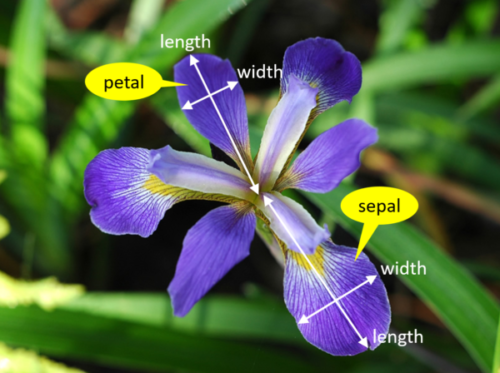

In [14]:
D_iris.shape

(150, 4)

In [15]:
np.cov(D_iris.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [16]:
np.cov(MinMaxScaler().fit_transform(D_iris).T)

array([[ 0.05290845, -0.00491134,  0.05999602,  0.05975355],
       [-0.00491134,  0.03298254, -0.02328082, -0.02111795],
       [ 0.05999602, -0.02328082,  0.08952249,  0.09149784],
       [ 0.05975355, -0.02111795,  0.09149784,  0.10086914]])

In [17]:
D = D_iris[:, 2:4]

Text(0.5, 1.0, 'Scatter plot of data matrix D')

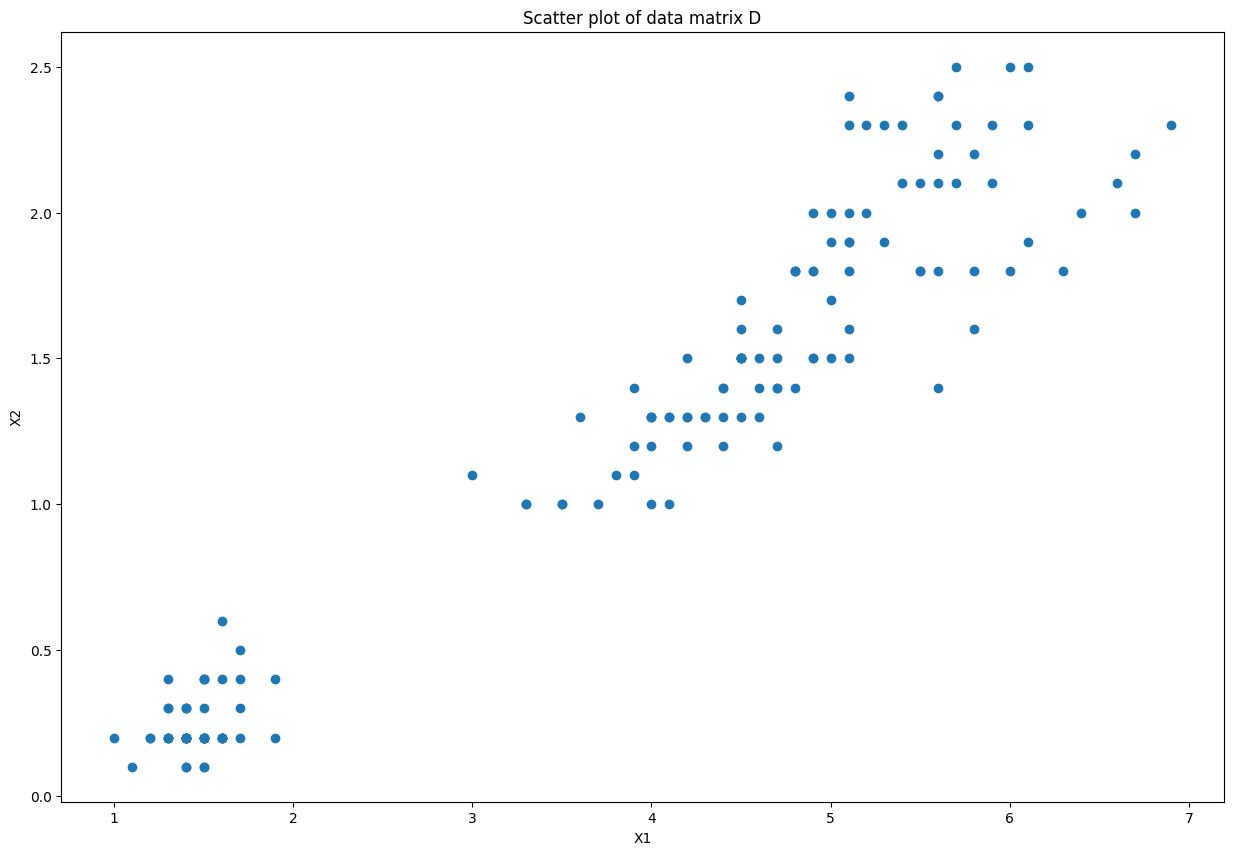

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
plt.scatter(D[:,0], D[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of data matrix D')

In [20]:
D.shape

(150, 2)

In [21]:
multivariate_mean = np.mean(D, axis=0)

In [22]:
print(multivariate_mean)

[3.758      1.19933333]


In [23]:
centered_data = D - multivariate_mean

In [24]:
np.mean(centered_data, axis=0)

array([-2.55203266e-15, -4.48530102e-16])

Text(0.5, 1.0, 'Scatter plot of centered and original data')

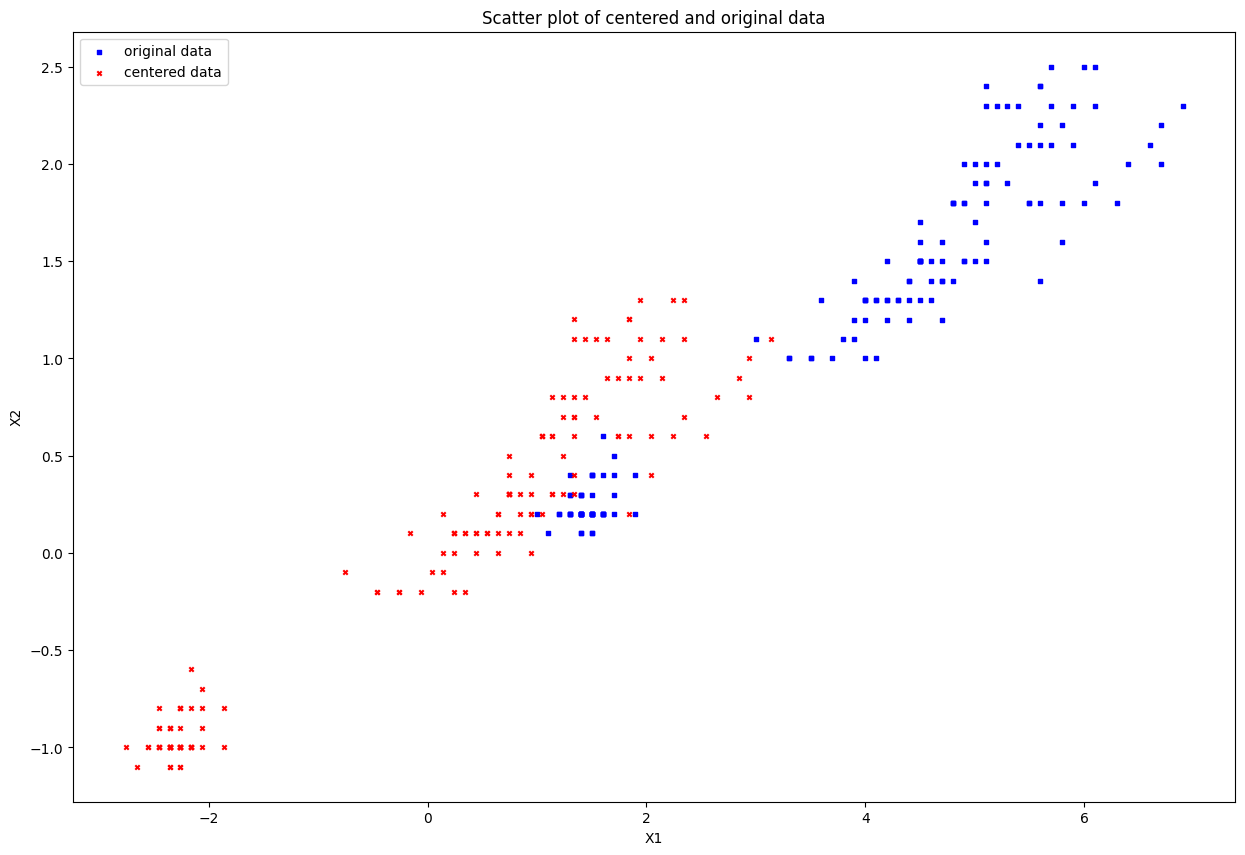

In [25]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='r', marker='x', label='centered data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and original data')

In [26]:
A = np.array([[2,1],[1,-1]])
print(A)

[[ 2  1]
 [ 1 -1]]


In [27]:
D[0,:]

array([1.4, 0.2])

In [28]:
A.dot(D[0,:])

array([3. , 1.2])

In [29]:
A.dot(D[1,:])

array([3. , 1.2])

In [30]:
D[1,:]

array([1.4, 0.2])

In [31]:
D.T.shape

(2, 150)

In [32]:
linearly_transformed_data = A.dot(D.T)
print(linearly_transformed_data)

[[ 3.   3.   2.8  3.2  3.   3.8  3.1  3.2  3.   3.1  3.2  3.4  2.9  2.3
   2.6  3.4  3.   3.1  3.7  3.3  3.6  3.4  2.2  3.9  4.   3.4  3.6  3.2
   3.   3.4  3.4  3.4  3.1  3.   3.2  2.6  2.8  2.9  2.8  3.2  2.9  2.9
   2.8  3.8  4.2  3.1  3.4  3.   3.2  3.  10.8 10.5 11.3  9.3 10.7 10.3
  11.   7.6 10.5  9.2  8.   9.9  9.  10.8  8.5 10.2 10.5  9.2 10.5  8.9
  11.4  9.3 11.3 10.6  9.9 10.2 11.  11.7 10.5  8.   8.7  8.4  9.  11.8
  10.5 10.6 10.9 10.1  9.5  9.3 10.  10.6  9.2  7.6  9.7  9.6  9.7  9.9
   7.1  9.5 14.5 12.1 13.9 13.  13.8 15.3 10.7 14.4 13.4 14.7 12.2 12.5
  13.1 12.  12.6 12.9 12.8 15.6 16.1 11.5 13.7 11.8 15.4 11.6 13.5 13.8
  11.4 11.6 13.3 13.2 14.1 14.8 13.4 11.7 12.6 14.5 13.6 12.8 11.4 12.9
  13.6 12.5 12.1 14.1 13.9 12.7 11.9 12.4 13.1 12. ]
 [ 1.2  1.2  1.1  1.3  1.2  1.3  1.1  1.3  1.2  1.4  1.3  1.4  1.3  1.
   1.   1.1  0.9  1.1  1.4  1.2  1.5  1.1  0.8  1.2  1.7  1.4  1.2  1.3
   1.2  1.4  1.4  1.1  1.4  1.2  1.3  1.   1.1  1.3  1.1  1.3  1.   1.
   1.1  1.   

In [33]:
linearly_transformed_data.shape

(2, 150)

Text(0.5, 1.0, 'Scatter plot of original data and linearly transformed data')

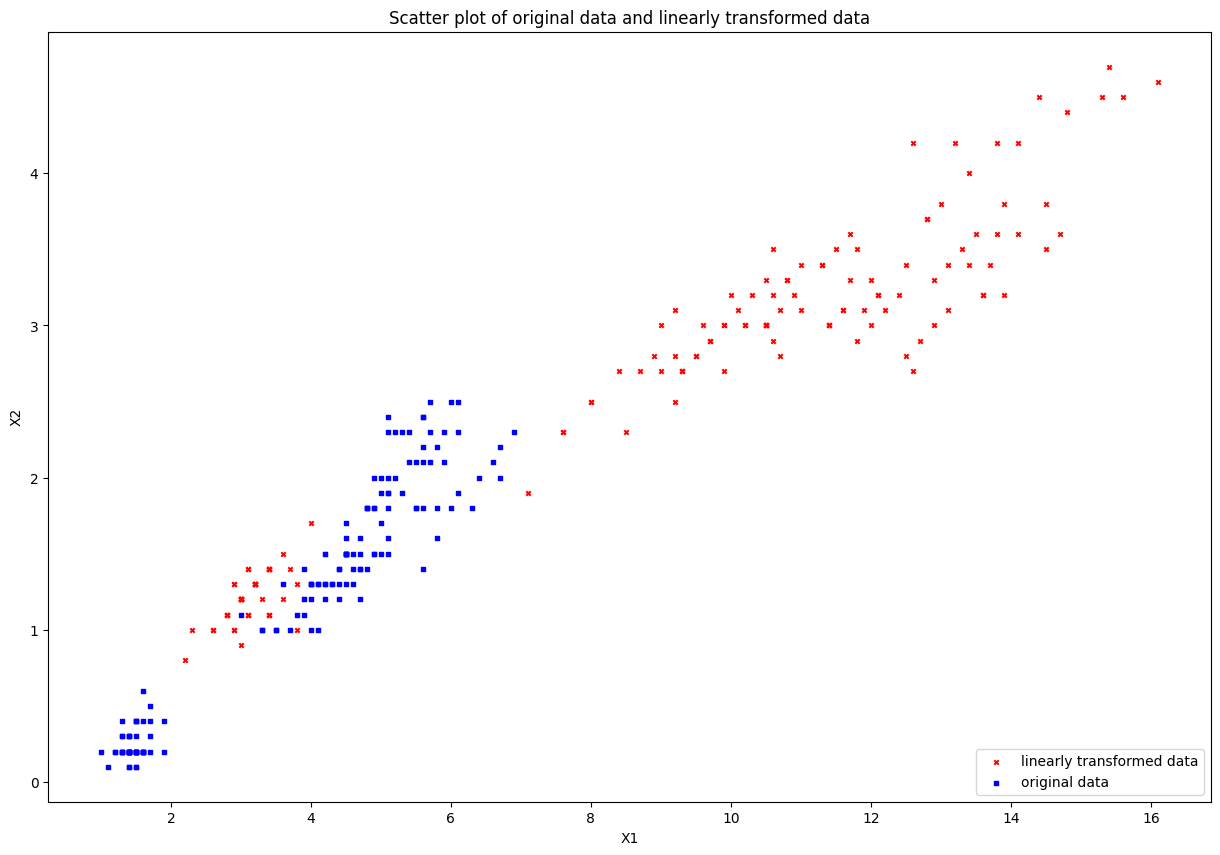

In [34]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(linearly_transformed_data[0,:], linearly_transformed_data[1,:], s=10, c='r', marker='x', label='linearly transformed data')
ax.scatter(D[:,0], D[:,1], s=10, c='b', marker='s', label='original data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='lower right')
plt.title('Scatter plot of original data and linearly transformed data')

In [35]:
Sigma = np.cov(D.T, ddof=1)

In [36]:
Sigma

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [37]:
n = D.shape[0]
1/(n-1)*np.dot(centered_data.T, centered_data)

array([[3.11627785, 1.2956094 ],
       [1.2956094 , 0.58100626]])

In [38]:
import numpy.linalg as LA
evalues, evectors = LA.eig(Sigma)

In [39]:
print(evectors)

[[ 0.92177769 -0.38771882]
 [ 0.38771882  0.92177769]]


In [40]:
print(evalues)

[3.66123805 0.03604607]


In [41]:
np.diag(Sigma)

array([3.11627785, 0.58100626])

In [42]:
total_var = sum(np.diag(Sigma))

In [43]:
total_var

3.697284116331096

In [44]:
sum(evalues)

3.6972841163310957

In [45]:
evalues[0]/(evalues[0]+evalues[1])

0.9902506624845562

In [46]:
coordinates_of_data_along_evec1 = evectors[:,0].T.dot(centered_data.T)

In [47]:
coordinates_of_data_along_evec1.shape

(150,)

In [48]:
print(coordinates_of_data_along_evec1)

[-2.56101214e+00 -2.56101214e+00 -2.65318991e+00 -2.46883437e+00
 -2.56101214e+00 -2.20693507e+00 -2.52224026e+00 -2.46883437e+00
 -2.56101214e+00 -2.50760626e+00 -2.46883437e+00 -2.37665660e+00
 -2.59978402e+00 -2.87631733e+00 -2.74536768e+00 -2.39129061e+00
 -2.57564615e+00 -2.52224026e+00 -2.24570695e+00 -2.43006249e+00
 -2.28447883e+00 -2.39129061e+00 -2.92972322e+00 -2.16816319e+00
 -2.10012330e+00 -2.37665660e+00 -2.29911284e+00 -2.46883437e+00
 -2.56101214e+00 -2.37665660e+00 -2.37665660e+00 -2.39129061e+00
 -2.50760626e+00 -2.56101214e+00 -2.46883437e+00 -2.74536768e+00
 -2.65318991e+00 -2.59978402e+00 -2.65318991e+00 -2.46883437e+00
 -2.61441803e+00 -2.61441803e+00 -2.65318991e+00 -2.22156908e+00
 -2.02257953e+00 -2.52224026e+00 -2.37665660e+00 -2.56101214e+00
 -2.46883437e+00 -2.56101214e+00  9.46116830e-01  8.00533174e-01
  1.16924425e+00  2.62100563e-01  8.92710943e-01  7.22989409e-01
  1.02366059e+00 -4.99459469e-01  8.15167179e-01  2.08694676e-01
 -3.15103930e-01  5.23999

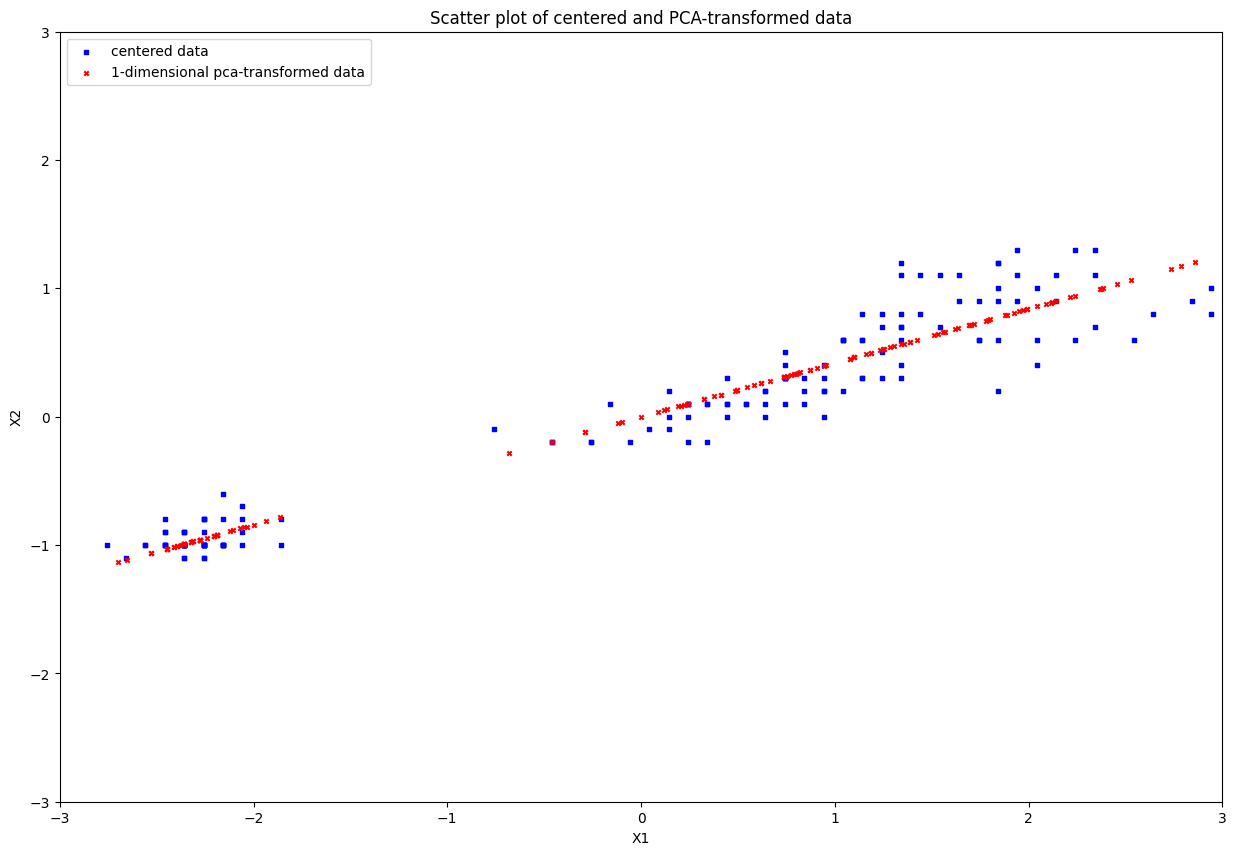

In [49]:
projected_data_on_evec1 = np.zeros((n,2))
for i in range(len(coordinates_of_data_along_evec1)):
    projected_data_on_evec1[i,:] = coordinates_of_data_along_evec1[i]*evectors[:,0]

pjdev1 = projected_data_on_evec1
# plot of centered data and its projection onto the first principial component (evec corresponding to largest eval)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='b', marker='s', label='centered data')
ax.scatter(pjdev1[:,0], pjdev1[:,1], s=10, c='r', marker='x', label='1-dimensional pca-transformed data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and PCA-transformed data')
plt.savefig('centered_and_pca_transformed_data.png')

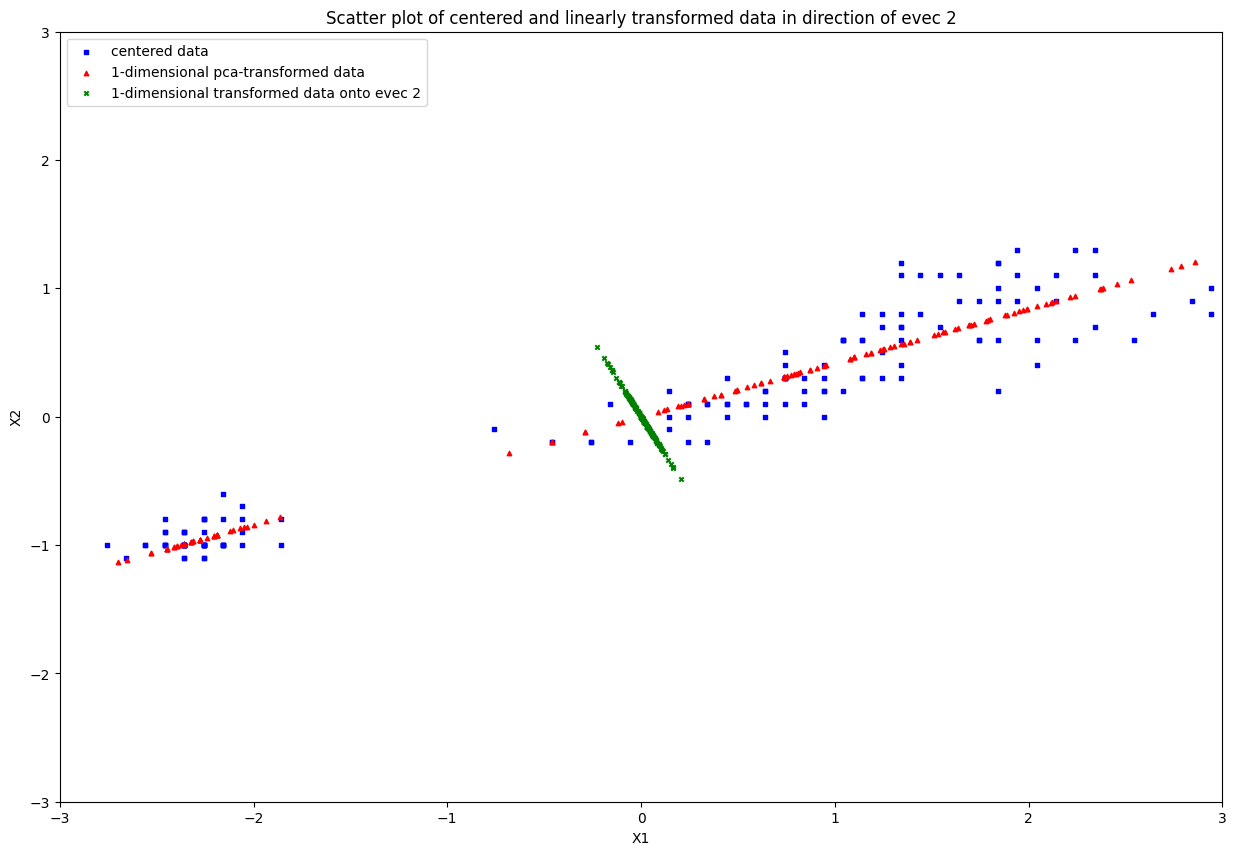

In [50]:
coordinates_of_data_along_evec2= evectors[:,1].T.dot(centered_data.T) 

projected_data_on_evec2 = np.zeros((n,2))
for i in range(len(coordinates_of_data_along_evec2)):
    projected_data_on_evec2[i,:] = coordinates_of_data_along_evec2[i]*evectors[:,1]

pjdev2 = projected_data_on_evec2
# plot of centered data and its projection onto (a) first PC and (b) second PC
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(centered_data[:,0], centered_data[:,1], s=10, c='b', marker='s', label='centered data')
ax.scatter(pjdev1[:,0], pjdev1[:,1], s=10, c='r', marker='^', label='1-dimensional pca-transformed data')
ax.scatter(pjdev2[:,0], pjdev2[:,1], s=10, c='g', marker='x', label='1-dimensional transformed data onto evec 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='upper left')
plt.title('Scatter plot of centered and linearly transformed data in direction of evec 2')
plt.savefig('centered_and_pca_transformed_data_evec2.png')

Text(0.5, 1.0, 'Scatter plot of data matrix D')

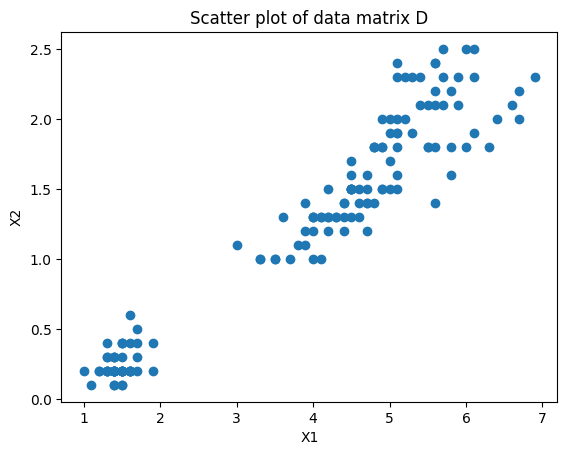

In [51]:
import matplotlib.pyplot as plt
plt.scatter(D[:,0], D[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of data matrix D')

Text(0.5, 1.0, 'scatter plot of transformed data with eigenvectors as axes')

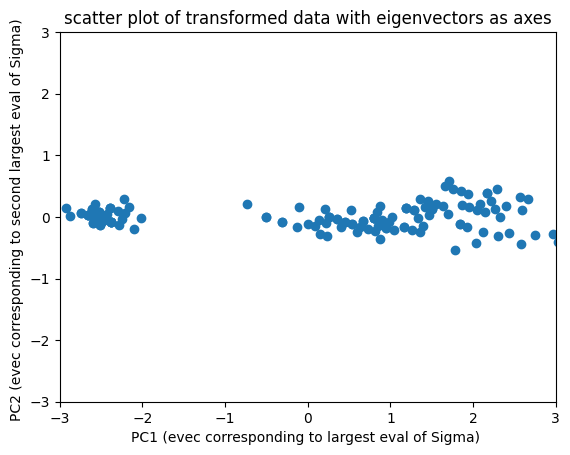

In [52]:
coordinates_of_data_in_evec_axes = evectors.T.dot(centered_data.T)
plt.scatter(coordinates_of_data_in_evec_axes[0,:], coordinates_of_data_in_evec_axes[1,:])
plt.xlabel('PC1 (evec corresponding to largest eval of Sigma) ')
plt.ylabel('PC2 (evec corresponding to second largest eval of Sigma) ')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('scatter plot of transformed data with eigenvectors as axes')

In [53]:
coordinates_of_data_in_evec_axes.shape

(2, 150)

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed_D = pca.fit_transform(D)

In [55]:
pca.explained_variance_ratio_

array([0.99025066, 0.00974934])

In [56]:
pca.explained_variance_

array([3.66123805, 0.03604607])

In [57]:
evalues

array([3.66123805, 0.03604607])

In [58]:
evalues[0]/(evalues[0]+evalues[1])

0.9902506624845562

In [59]:
evalues[1]/(evalues[0]+evalues[1])

0.009749337515443846

In [66]:
pca.components_ #listed row-wise, in order of decreasing evalue magnitude

array([[ 0.92177769,  0.38771882],
       [-0.38771882,  0.92177769]])

In [61]:
evectors

array([[ 0.92177769, -0.38771882],
       [ 0.38771882,  0.92177769]])

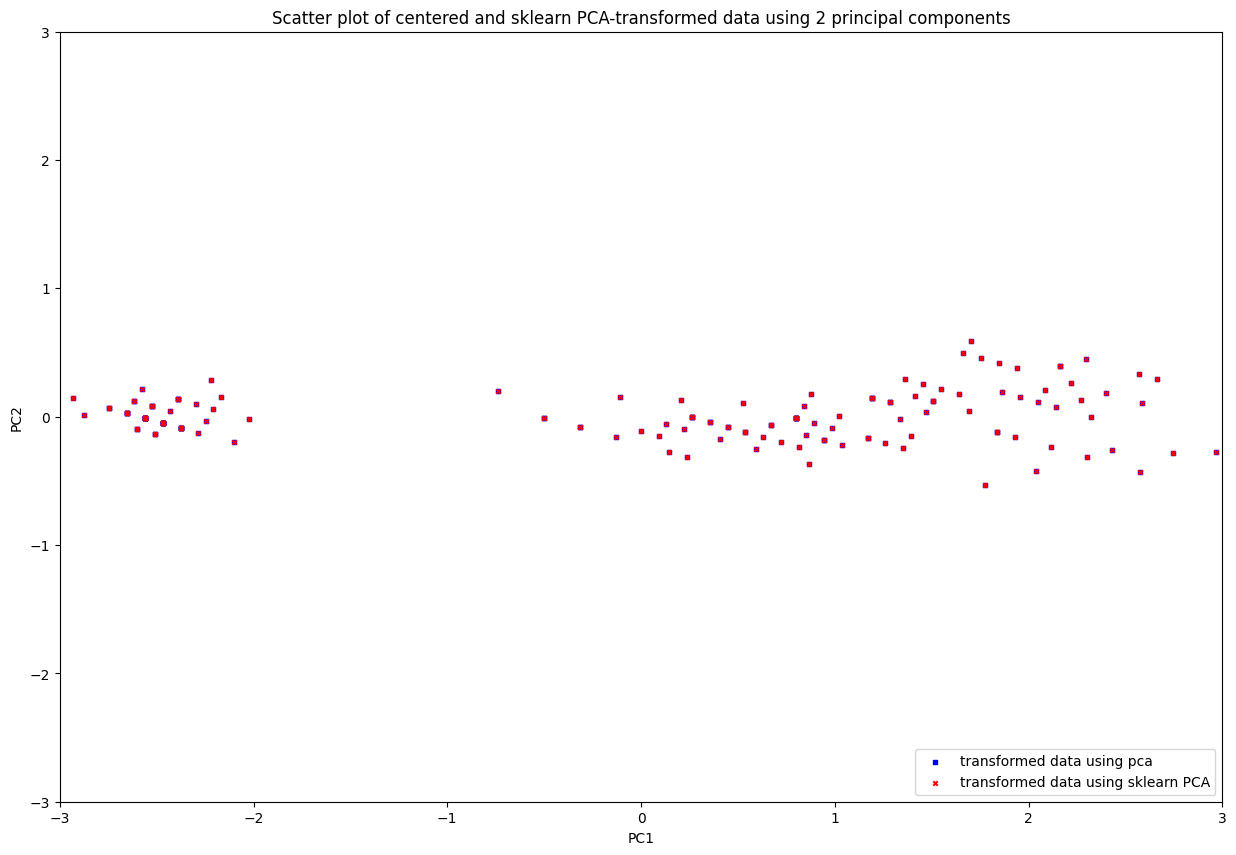

In [67]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(coordinates_of_data_in_evec_axes[0,:], coordinates_of_data_in_evec_axes[1,:], s=10, c='b', marker='s', label='transformed data using pca')
ax.scatter(pca_transformed_D[:,0], pca_transformed_D[:,1], s=10, c='r', marker='x', label='transformed data using sklearn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.legend(loc='lower right')
plt.title('Scatter plot of centered and sklearn PCA-transformed data using 2 principal components')
plt.savefig('centered_and_pca_transformed_data_2components.png')

In [68]:
np.cov(coordinates_of_data_in_evec_axes,ddof=1)

array([[ 3.66123805e+00, -2.95065985e-16],
       [-2.95065985e-16,  3.60460707e-02]])

In [69]:
np.cov(pca_transformed_D.T,ddof=1)

array([[3.66123805e+00, 2.98046450e-18],
       [2.98046450e-18, 3.60460707e-02]])

In [70]:
D_iris = load_iris()['data']
pca = PCA(n_components=3)
pca_transformed_D_iris = pca.fit_transform(D_iris)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

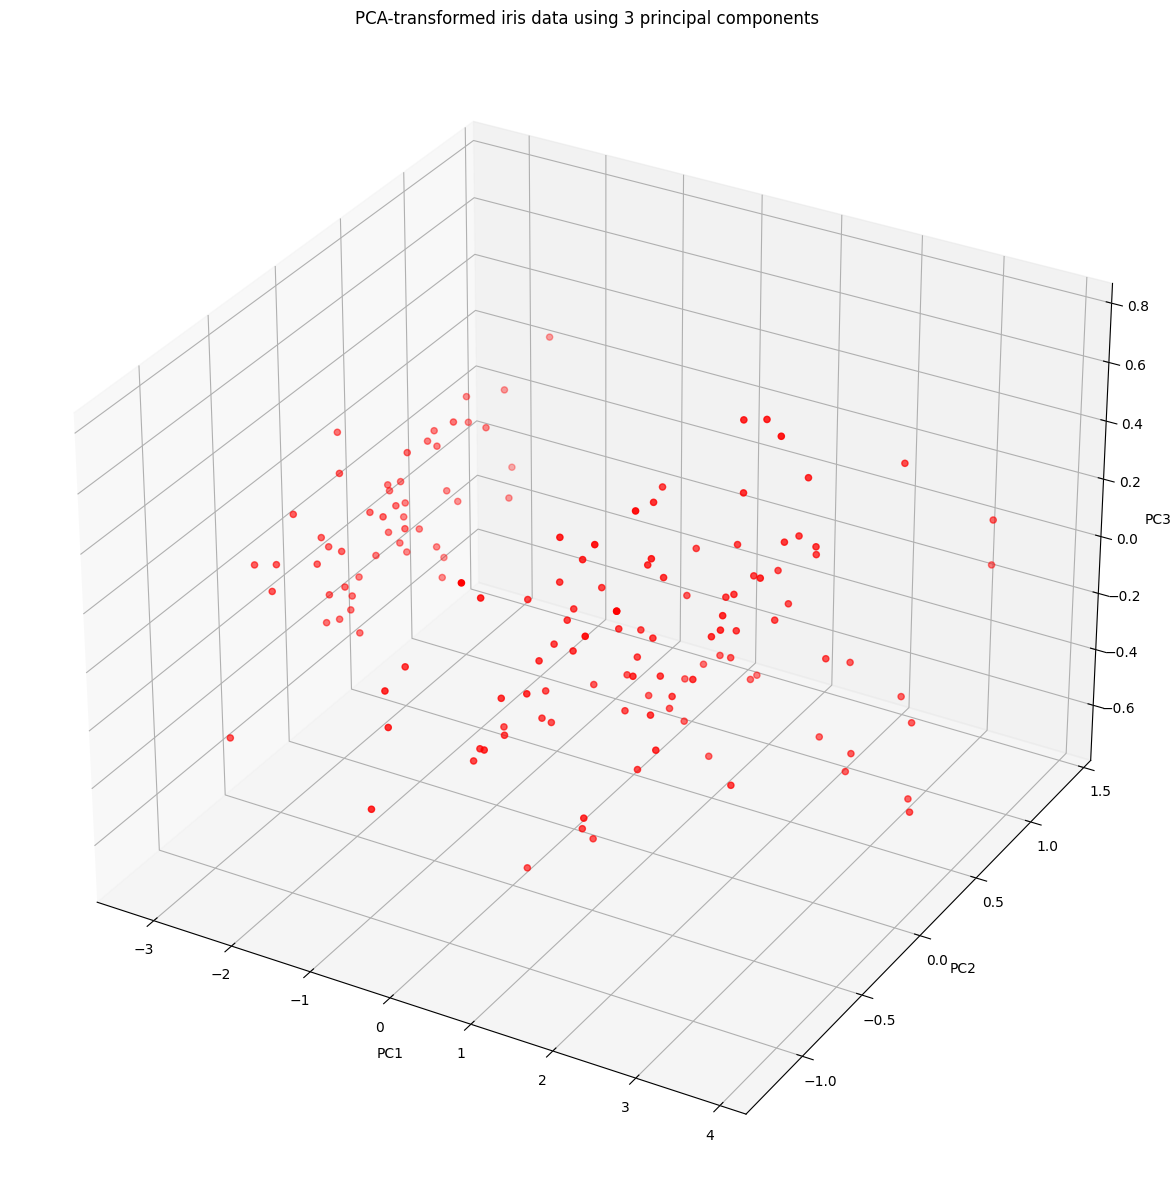

In [71]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(pca_transformed_D_iris[:,0], pca_transformed_D_iris[:,1], pca_transformed_D_iris[:,2], c='r');
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA-transformed iris data using 3 principal components')
plt.savefig('pca-3d-transformed-iris-data.png')

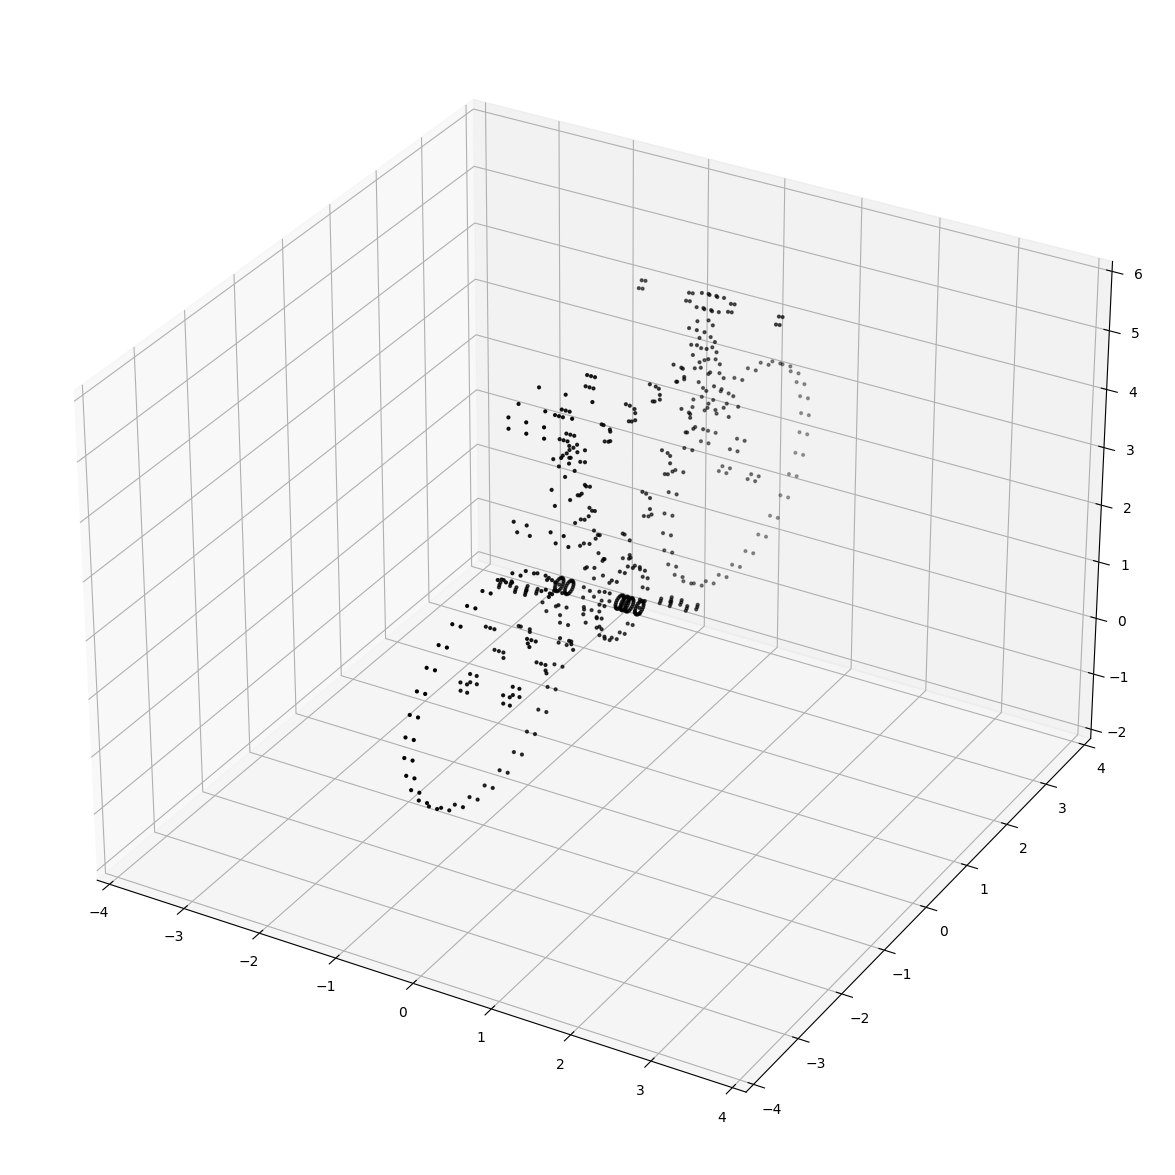

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

def bike_plot(df):
    df.columns=['x', 'y', 'z']
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d', xlim=[-4, 4], ylim=[-4, 4], zlim=[-2, 6])

    x = df['x']
    y = df['y']
    z = df['z']

    ax.scatter(x, y, z, marker='o', s=4, color='k')

X = pd.read_csv('bike.csv', sep=';', header=None)
bike_plot(X)

# Active learning activity: 
a. let's transformed the bicycle data using the Scikit-learns `PCA` module. We will specify it to have 2 components, since we're trying to turn a 3D image into a 2D projection.

b. let's plot the transformed data. We expect to obtain the 2D projection.

c. What happens if we use this fitted transformer on a rotated version of the bicycle model? Let's load in the data of another bicycle model. This one has been rotated in 3D space compared to the original.

In [ ]:
X_rotated = pd.read_csv('bike-rotate.csv', sep=';', header=None)
bike_plot(X_rotated)

d. Change the code in the cell above such that you no longer use an already trained transformer but instead make a new one and get a 2D projection of the rotated bicycle that preserves as much information as possible.